# Proteomic Data-Based Breast Cancer Classification


## Introduction
Breast cancer is the most common cancer in women in the United States, except for skin cancers. It is about 30% (or 1 in 3) of all new female cancers each year (American Cancer Society). As one of the more prevalent types of cancer, breast cancer has been heavilty studied on a cellular level. The use of precision medicine and gene therapy has become more common in the treatment of cancers . Precision medicine refers to the tailoring of medical treatment based on the cellular profile of a disease and the patient’s genome. 
Breast cancer is typically classified into five molecular subtypes, HER2, Luminal A, Luminal B, Luminal B-like and Basal-like. These molecular subtypes are typically determined by the genes that the cancer cell expresses. Molecular subtype classification is important because it leads to different standards of care and can improve treatment research. For example, Luminal A cancers tend grow more slowly than other cancers, be lower grade, and have a good prognosis, while HER2-enriched cancers tend to grow faster than luminal cancers and can have a worse prognosis, but are usually successfully treated with targeted therapy medicines aimed at the HER2 protein (Sheng 2022). 

## Background

With the prevalence of precision medicine and gene therapy, breast cancer has been studied extensively at the genomic level. Currently, the subtypes have been classified with sequencing and microarray technologies, but in recent years advances in mass spec technologies have provided deep proteome coverage and data. For example, the study in 2017, "Proteomic maps of breast cancer subtypes" found that in a comparison between proteomic data and genomic data, there is low correlation between the copy number variants in the genome and the relative change at the protein levels. This indicates that genomic variations are not translated or only partially translated to the protein level. This is important because germline copy number variations at the genomic level are associated with breast cancer risk and prognosis. Thus, it could be very useful to analyze differences of cellular function at the protein level, in additon to the genomic data to create more targeted treatment for subtype specific cancers classifications.


## Objective
### How is this project applicable to healthcare?

This project aims to find distinct differences in proteomic data between breast cancer molecular subtypes that could be used to further classify breast cancer into subtype-specific distinctions. More specilized and accepted classifications of breast cancer could improve treatment at the cellular level and lead to better patient prognosis and treatment. 
 

## Literature
Info about cancer prevalence 
https://www.cancer.org/cancer/breast-cancer/about/how-common-is-breast-cancer.html

Proteogenomics connects somatic mutations to signalling in breast cancer
http://www.nature.com/nature/journal/v534/n7605/full/nature18003.html

Breast Cancer Classification Based on Proteotypes Obtained by SWATH Mass Spectrometry
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6656695/

Proteomic maps of breast cancer subtypes
https://www.nature.com/articles/ncomms10259

Features Selection and Extraction in Statistical Analysis of Proteomics Datasets
https://link.springer.com/protocol/10.1007/978-1-0716-1641-3_9

Info about subtypes
https://www.breastcancer.org/types/molecular-subtypes

Proteogenomics connects somatic mutations to signalling in breast cancer
http://www.nature.com/nature/journal/v534/n7605/full/nature18003.html

This is the original study done on the dataset used for this project. The data was used to assess how the mutations in the DNA translate to the protein expression landscape in breast cancer. Genes in our DNA are first transcribed into RNA molecules which then are translated into proteins. Changing the information content of DNA has impact on the behavior of the proteome, which is the main functional unit of cells, taking care of cell division, DNA repair, enzymatic reactions and signaling etc. 



## Dataset Info
This project is working with two datasets, both are obtained from https://proteomic.datacommons.cancer.gov/pdc/browse/ and contain 77 cancer patients and 3 healthy patients. One dataset contains patient clinical information and the other dataset contains proteomic data for most patients listed in the clinical dataset. The proteomic dataset contains 12,000 genes and corresponding protein ratios for each patient and clinical dataset contains the molecular subtype for breast cancer. Datasets will be combine on the patients unique IDs AO-A12D.01TCGA from proteomes and TCGA-A2-A0T2 from the clinical. 


In [185]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn, re
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense

# Import Dataset

In [133]:
proteomes = pd.read_csv("77_cancer_proteomes_CPTAC_itraq.csv")
clinical =pd.read_csv("clinical_data_breast_cancer.csv", index_col=0)
proteomes.shape
clinical.shape
proteomes.describe()
clinical.info()
clinical.head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, TCGA-A2-A0T2 to TCGA-E2-A15A
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               105 non-null    object 
 1   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 2   ER Status                            105 non-null    object 
 3   PR Status                            105 non-null    object 
 4   HER2 Final Status                    105 non-null    object 
 5   Tumor                                105 non-null    object 
 6   Tumor--T1 Coded                      105 non-null    object 
 7   Node                                 105 non-null    object 
 8   Node-Coded                           105 non-null    object 
 9   Metastasis                           105 non-null    object 
 10  Metastasis-Coded                     105 non-null    object 
 11  AJCC Stage       

,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,T_Other,N0,Negative,M0,...,Basal-like,0,-13,3,5,X,1,2,2,2
TCGA-A2-A0D0,FEMALE,60,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,2,5,Basal,1,2,2,2


# Clean and Merge Datasets

In [134]:
#change order of ID and to match clinical dataset and flip rows and columns
proteomes = proteomes.drop(['gene_symbol','gene_name'], axis=1)
proteomes.rename(columns=lambda x: "TCGA-%s" % (re.split('[_|-|.]',x)[0]) 
                 if bool(re.search("TCGA",x)) is True else x,inplace=True)
proteomes = proteomes.transpose()

In [135]:
#drop data in clinicl dataset that is not a part of proteomic dataset
clinical = clinical.loc[[x for x in clinical.index.tolist() if x in proteomes.index],:]

In [136]:
#move first row up as column names for proteome dataset
proteomes = proteomes.rename(columns=proteomes.iloc[0])


In [137]:
proteomes= proteomes.iloc[1: , :]
proteomes.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
TCGA-AO-A12D,1.096131,1.11137,1.11137,1.107561,1.11518,1.107561,1.11137,1.11137,-1.51739,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.03576,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
TCGA-C8-A130,-0.49406,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


In [138]:
#convert proteomes data from object to float
s = proteomes.select_dtypes(include='object').columns
proteomes[s] = proteomes[s].astype("float")
proteomes.dtypes

NP_958782       float64
NP_958785       float64
NP_958786       float64
NP_000436       float64
NP_958781       float64
                 ...   
NP_001191293    float64
NP_775791       float64
NP_004065       float64
NP_068752       float64
NP_219494       float64
Length: 12553, dtype: object

In [139]:
#merge the clinical and proteome datasets
merged_data = proteomes.merge(clinical,left_index=True,right_index=True)

In [140]:
#update name of column
merged_data.rename(columns = {'PAM50 mRNA':'PAM50_mRNA'}, inplace = True)
merged_data = merged_data.drop('NP_000044', axis=1)
#make dataset only numeric variables 
#assign y to class column
y = merged_data["PAM50_mRNA"]
X = merged_data.iloc[:,1:12552]
data = X.join(y)
data['PAM50_mRNA'] = data['PAM50_mRNA'].astype(str)
data['PAM50_mRNA'] = data['PAM50_mRNA'].str.replace('-', '')
data.head(10)

,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,NP_076965,...,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494,PAM50_mRNA
TCGA-A2-A0CM,0.694424,0.698098,0.687077,0.687077,0.698098,0.698098,0.698098,-2.652150,-0.984373,-0.547225,...,NaN,1.153614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basallike
TCGA-A2-A0D2,0.104164,0.107491,0.097512,0.104164,0.104164,0.104164,0.104164,-0.880454,-1.512473,-1.406028,...,-1.648856,0.832649,NaN,-8.324969,-4.679219,NaN,-1.106650,NaN,-6.941181,Basallike
TCGA-A2-A0EQ,-0.927979,-0.927979,-0.931806,-0.927979,-0.927979,-0.927979,-0.927979,-3.071151,-2.278943,-2.236845,...,NaN,NaN,3.802310,-6.373934,-1.123160,NaN,NaN,NaN,NaN,HER2enriched
TCGA-A2-A0EV,0.472590,0.472590,0.458587,0.472590,0.472590,0.472590,0.472590,-0.742871,1.811277,1.956909,...,-1.471027,NaN,-0.474013,-12.278546,-10.337729,-0.653251,NaN,NaN,NaN,Luminal A
TCGA-A2-A0EX,1.192612,1.188860,1.185108,1.200116,1.188860,1.188860,1.192612,1.046289,2.138081,1.732880,...,-2.018981,0.877456,NaN,NaN,-6.101005,NaN,-1.726336,NaN,NaN,Luminal A
TCGA-A2-A0EY,1.183209,1.183209,1.174881,1.179045,1.183209,1.183209,1.183209,4.955702,0.825113,0.308790,...,-0.507334,NaN,NaN,4.597606,6.179888,NaN,NaN,NaN,NaN,Luminal B
TCGA-A2-A0SW,-0.487772,-0.487772,-0.487772,-0.503853,-0.487772,-0.487772,-0.487772,-1.626289,0.731148,0.358075,...,0.969143,NaN,-1.053815,NaN,NaN,NaN,NaN,NaN,NaN,Luminal B
TCGA-A2-A0SX,-0.392601,-0.392601,-0.392601,-0.395581,-0.392601,-0.392601,-0.392601,-2.504862,0.694810,0.572663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basallike
TCGA-A2-A0T3,0.580623,0.580623,0.586803,0.586803,0.586803,0.586803,0.586803,0.052212,1.501479,1.053412,...,-1.650444,-0.578172,2.017529,NaN,-12.265010,NaN,-1.264179,-1.100403,-5.590348,Luminal B
TCGA-A2-A0T6,0.818182,0.814724,0.800892,0.818182,0.811266,0.811266,0.811266,1.381834,1.565108,1.509780,...,-2.415042,-0.620344,0.002095,NaN,-13.120988,NaN,NaN,1.181271,NaN,Luminal A


# Check for Class breakdown

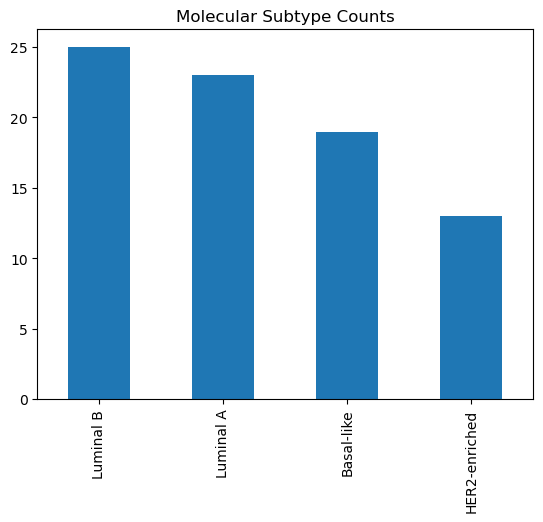

In [141]:
#plot counts for each molecular subtype to see count for each class
merged_data['PAM50_mRNA'].value_counts().plot(kind='bar')
plt.title("Molecular Subtype Counts");

Imbalanced classes, uses strafitifed Kfold for splitting into training and test

In [142]:
X = X.reset_index(drop=True)
X

,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,NP_076965,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
0,0.694424,0.698098,0.687077,0.687077,0.698098,0.698098,0.698098,-2.652150,-0.984373,-0.547225,...,NaN,NaN,1.153614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.104164,0.107491,0.097512,0.104164,0.104164,0.104164,0.104164,-0.880454,-1.512473,-1.406028,...,0.919136,-1.648856,0.832649,NaN,-8.324969,-4.679219,NaN,-1.106650,NaN,-6.941181
2,-0.927979,-0.927979,-0.931806,-0.927979,-0.927979,-0.927979,-0.927979,-3.071151,-2.278943,-2.236845,...,-0.801685,NaN,NaN,3.802310,-6.373934,-1.123160,NaN,NaN,NaN,NaN
3,0.472590,0.472590,0.458587,0.472590,0.472590,0.472590,0.472590,-0.742871,1.811277,1.956909,...,-4.966177,-1.471027,NaN,-0.474013,-12.278546,-10.337729,-0.653251,NaN,NaN,NaN
4,1.192612,1.188860,1.185108,1.200116,1.188860,1.188860,1.192612,1.046289,2.138081,1.732880,...,1.451490,-2.018981,0.877456,NaN,NaN,-6.101005,NaN,-1.726336,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2.779709,2.779709,2.797995,2.787023,2.779709,2.783366,2.783366,2.205538,0.749997,-0.156974,...,-3.250913,1.711825,-0.248402,NaN,4.707022,4.107251,-3.203370,1.971481,NaN,NaN
76,0.542211,0.542211,0.534981,0.542211,0.542211,0.542211,0.542211,-0.148205,0.267490,0.159048,...,-5.107629,-0.975980,NaN,2.508629,-12.337110,-9.546530,-4.066584,NaN,NaN,NaN
77,0.870186,0.870186,0.866423,0.870186,0.870186,0.870186,0.870186,1.920171,2.349197,1.581466,...,-3.386203,-2.328692,-2.806642,NaN,-4.733495,-9.584499,-4.786183,-3.103949,NaN,NaN
78,-1.095492,-1.095492,-1.095492,-1.095492,-1.093252,-1.093252,-1.093252,0.096627,-1.149272,-1.270277,...,-0.638364,0.051811,2.509998,7.067839,NaN,0.378972,NaN,NaN,0.665797,NaN


# Split data into training, validation, and test

In [154]:
# Shuffle the data
data = data.sample(frac=1, random_state=42)

# Split the data into training, validation, and test sets
train_size = int(0.6 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

# Initialize StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Get the training and test data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    

# Exploratory Analysis
Use unsupervised learning for exploratroy analysis

In [160]:
#use median for data imputation since not a normal distribution 

X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_val.median())
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
#checking class names
print("Unique integer labels:", np.unique(y_train_encoded))
print("Corresponding classes:", le.classes_)

y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)



Unique integer labels: [0 1 2 3]
Corresponding classes: ['Basal-like' 'HER2-enriched' 'Luminal A' 'Luminal B']


## Scale data

In [162]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Scale the validation data using the scaler fitted on the training data
X_val_scaled = scaler.transform(X_val)

## K-means with t-SNE to reduce data

/Users/kelseynicholson/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kelseynicholson/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


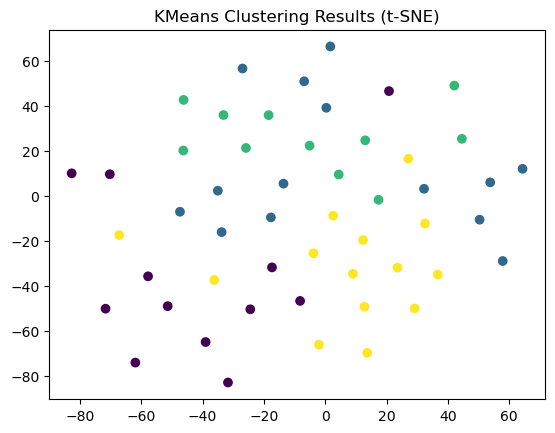

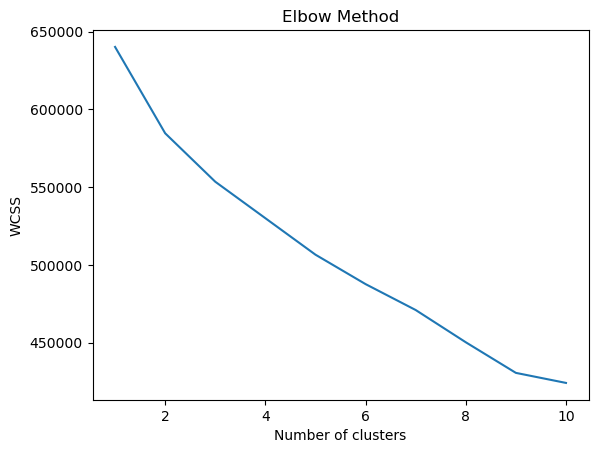

In [169]:
# Fit KMeans model on data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)

# Obtain cluster labels
labels = kmeans.labels_

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_train_scaled)

# Plot reduced data points using cluster labels as color
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels)
plt.title("KMeans Clustering Results (t-SNE)")

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. number of clusters
plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Used t-SNE to reduce the dimensionality (~12000 features) of the data to improve visulization and interpretation. From visual inspection can see some distinct classes, but there is a lot of overlap between classes. According to the elbow plot the optimal number of clusters would be around 8, instead of four.  

# Hierarchical Clustering

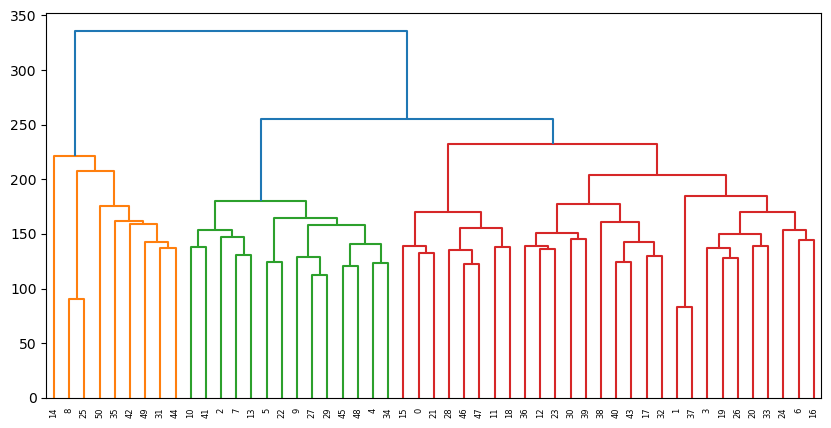

In [171]:
# Compute the linkage matrix
Z = linkage(X_train_scaled, 'ward')

# Set the color threshold based on the classes
color_threshold = 0.7 * np.max(Z[:,2])

# Plot the dendrogram with the color threshold
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(Z, ax=ax, color_threshold=color_threshold)

# Show the plot
plt.show()

From the Hierarchical Clustering plot we can see three distinct clusters with most similarities between the green and red clusters. Indicating there are groupings within the data, but more exploration will be needed to determine if these differences can be determined between classes. 

# DBSCAN

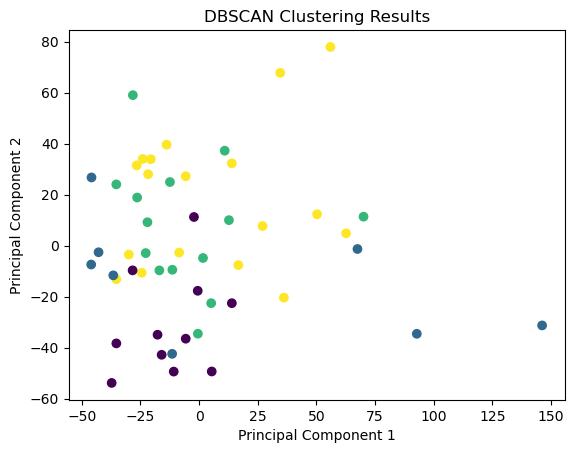

In [165]:

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X_train_scaled)

# Plot the results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering Results")
plt.show()

Used PCA to reduce the dimesionality of the dataset and grouped data by class, some of the data has clustering, but it can be visulized that a number of the points between classes overlap. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are close to each other and can visulize some clustering by class. The reduced features will be used to train the deep neural network.

# MLP Implementation with PCA for data reduction

In [176]:
# Define a pipeline to apply PCA and MLP
pca_mlp = Pipeline([('pca', PCA(n_components=2)),
                    ('mlp', MLPClassifier(hidden_layer_sizes=(10, 10)))])
# Fit the pipeline to the training data
pca_mlp.fit(X_train_scaled, y_train_encoded)
y_pred = pca_mlp.predict(X_val_scaled)
# Evaluate the model on the test data
f1_macro = f1_score(y_val_encoded, y_pred, average='macro')
# Print the f1 score
print("F1-score with macro averaging: {:.2f}".format(f1_macro))


F1-score with macro averaging: 0.46


/Users/kelseynicholson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Neural Network

In [211]:
from keras.metrics import Precision, Recall
import keras.backend as K
#define macro f1 score since keras doesnt have a built in option
def macro_f1(y_true, y_pred):
    # Convert predictions to binary values
    y_pred = K.round(y_pred)
    # Calculate F1 score for each class
    f1s = []
    for i in range(y_true.shape[1]):
        tp = K.sum(K.cast(y_true[:, i] * y_pred[:, i], 'float'), axis=0)
        fp = K.sum(K.cast((1-y_true[:, i]) * y_pred[:, i], 'float'), axis=0)
        fn = K.sum(K.cast(y_true[:, i] * (1-y_pred[:, i]), 'float'), axis=0)
        precision = tp / (tp + fp + K.epsilon())
        recall = tp / (tp + fn + K.epsilon())
        f1 = 2 * precision * recall / (precision + recall + K.epsilon())
        f1s.append(f1)
    # Calculate macro F1 score
    macro_f1 = K.mean(K.stack(f1s))
    return macro_f1

# Convert y_train_encoded to one-hot encoded format
y_train_onehot = to_categorical(y_train_encoded, num_classes=4)
#Define the deep neural network 
model = Sequential()
model.add(Dense(128, input_dim=12551, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[macro_f1])

# Train the model on the reduced feature space
model.fit(X_train_scaled, y_train_onehot, epochs=50, batch_size=32)

Epoch 1/50
2/2 [==============================] - 1s 18ms/step - loss: 1.6102 - macro_f1: 0.3153
Epoch 2/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0509 - macro_f1: 0.9917
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - macro_f1: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 15ms/step - loss: 5.5708e-04 - macro_f1: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 16ms/step - loss: 2.2667e-04 - macro_f1: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 12ms/step - loss: 4.6229e-04 - macro_f1: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 15ms/step - loss: 4.2205e-04 - macro_f1: 0.8750
Epoch 8/50
2/2 [==============================] - 0s 17ms/step - loss: 1.4527e-04 - macro_f1: 0.8750
Epoch 9/50
2/2 [==============================] - 0s 15ms/step - loss: 9.0731e-05 - macro_f1: 1.0000
Epoch 10/50
2/2 [==============================] - 0s 14ms/step - loss: 1.0286e-04 - macro_f1: 1.0000
E

Still working on this, will continue with model optimization 